In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
import requests
from datetime import datetime

In [3]:
#Create a set of random latitude and logitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs=np.random.uniform(low=-90.000, high=90.000, size = 1500)
lats_lngs=zip(lats,lngs)
lats_lngs

In [4]:
#Add the latitutudes and longitudes to a list
coordinates=list(lats_lngs)
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [ ]:
cities

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | colesberg
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | cabinda
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | carmaux
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | harlingen
Processing Record 15 of Set 1 | san juan
Processing Record 16 of Set 1 | bologoye
Processing Record 17 of Set 1 | tabou
Processing Record 18 of Set 1 | iona
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | grand gaube
Processing Rec

Processing Record 35 of Set 4 | diamantino
Processing Record 36 of Set 4 | kochki
Processing Record 37 of Set 4 | fuerte olimpo
Processing Record 38 of Set 4 | sao filipe
Processing Record 39 of Set 4 | mercedes
Processing Record 40 of Set 4 | galle
Processing Record 41 of Set 4 | dunn
Processing Record 42 of Set 4 | bolshiye klyuchishchi
City not found. Skipping...
Processing Record 43 of Set 4 | tayga
Processing Record 44 of Set 4 | el faiyum
City not found. Skipping...
Processing Record 45 of Set 4 | shache
Processing Record 46 of Set 4 | west bay
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | havre-saint-pierre
Processing Record 49 of Set 4 | safaga
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | nchelenge
Processing Record 2 of Set 5 | rocha
Processing Record 3 of Set 5 | aswan
Processing Record 4 of Set 5 | gurupi
Processing Record 5 of Set 5 | inhambane
Processing Record 6 of Set 5 | raudeberg
Processing Record 7 of Set 

Processing Record 24 of Set 8 | conceicao do rio verde
Processing Record 25 of Set 8 | waddan
Processing Record 26 of Set 8 | bafq
Processing Record 27 of Set 8 | matay
Processing Record 28 of Set 8 | kingseat
Processing Record 29 of Set 8 | westport
Processing Record 30 of Set 8 | pushkino
Processing Record 31 of Set 8 | bababe
City not found. Skipping...
Processing Record 32 of Set 8 | ballina
Processing Record 33 of Set 8 | sechura
Processing Record 34 of Set 8 | nkhata bay
Processing Record 35 of Set 8 | alvinopolis
Processing Record 36 of Set 8 | urozhaynoye
Processing Record 37 of Set 8 | wolmaranstad
City not found. Skipping...
Processing Record 38 of Set 8 | qasigiannguit
Processing Record 39 of Set 8 | hurghada
Processing Record 40 of Set 8 | moroni
Processing Record 41 of Set 8 | santa maria
Processing Record 42 of Set 8 | teguise
Processing Record 43 of Set 8 | kytlym
City not found. Skipping...
Processing Record 44 of Set 8 | puerto cabello
Processing Record 45 of Set 8 | w

Processing Record 10 of Set 12 | potomac
Processing Record 11 of Set 12 | mugango
Processing Record 12 of Set 12 | sal rei
Processing Record 13 of Set 12 | sao miguel do araguaia
Processing Record 14 of Set 12 | eenhana
Processing Record 15 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 16 of Set 12 | roanne
Processing Record 17 of Set 12 | barinas
Processing Record 18 of Set 12 | trelew
Processing Record 19 of Set 12 | manacapuru
Processing Record 20 of Set 12 | aguimes
Processing Record 21 of Set 12 | berlevag
Processing Record 22 of Set 12 | molokovo
Processing Record 23 of Set 12 | miguelopolis
Processing Record 24 of Set 12 | potsdam
Processing Record 25 of Set 12 | hamina
Processing Record 26 of Set 12 | shchuchye
City not found. Skipping...
Processing Record 27 of Set 12 | mobaye
Processing Record 28 of Set 12 | mali
Processing Record 29 of Set 12 | hollins
Processing Record 30 of Set 12 | onega
Processing Record 31 of Set 12 | tsumeb
Processing Record 32

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,76.48,89,5,11.01,BR,2022-04-06 02:25:22
1,Colesberg,-30.7200,25.0972,50.05,59,0,6.49,ZA,2022-04-06 02:29:16
2,Bredasdorp,-34.5322,20.0403,58.03,75,14,14.00,ZA,2022-04-06 02:29:16
3,Cabinda,-5.5500,12.2000,76.78,92,100,5.77,AO,2022-04-06 02:29:17
4,Carmaux,44.0510,2.1580,38.32,70,28,1.01,FR,2022-04-06 02:29:17
5,Cape Town,-33.9258,18.4232,58.12,88,75,6.91,ZA,2022-04-06 02:25:25
6,East London,-33.0153,27.9116,65.26,68,50,10.69,ZA,2022-04-06 02:29:18
7,Codrington,-38.2667,141.9667,63.48,59,84,11.39,AU,2022-04-06 02:29:18
8,Souillac,-20.5167,57.5167,79.18,89,40,6.91,MU,2022-04-06 02:29:19
9,Saint George,37.1041,-113.5841,72.63,18,0,16.11,US,2022-04-06 02:29:19


In [10]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2022-04-06 02:25:22,-22.9661,-42.0278,76.48,89,5,11.01
1,Colesberg,ZA,2022-04-06 02:29:16,-30.7200,25.0972,50.05,59,0,6.49
2,Bredasdorp,ZA,2022-04-06 02:29:16,-34.5322,20.0403,58.03,75,14,14.00
3,Cabinda,AO,2022-04-06 02:29:17,-5.5500,12.2000,76.78,92,100,5.77
4,Carmaux,FR,2022-04-06 02:29:17,44.0510,2.1580,38.32,70,28,1.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
#Load city data from CSV
city_data_df=pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Arraial Do Cabo,BR,4/6/2022 2:25,-22.9661,-42.0278,76.48,89,5,11.01
1,1,Colesberg,ZA,4/6/2022 2:29,-30.7200,25.0972,50.05,59,0,6.49
2,2,Bredasdorp,ZA,4/6/2022 2:29,-34.5322,20.0403,58.03,75,14,14.00
3,3,Cabinda,AO,4/6/2022 2:29,-5.5500,12.2000,76.78,92,100,5.77
4,4,Carmaux,FR,4/6/2022 2:29,44.0510,2.1580,38.32,70,28,1.01
...,...,...,...,...,...,...,...,...,...,...
564,564,Mindif,CM,4/6/2022 2:44,10.3976,14.4363,89.11,28,26,6.06
565,565,Rudnichnyy,RU,4/6/2022 2:44,59.6170,52.4703,22.24,97,67,6.44
566,566,Raga,SS,4/6/2022 2:44,8.4596,25.6780,79.12,47,47,4.88
567,567,Mitsamiouli,KM,4/6/2022 2:44,-11.3847,43.2844,81.03,75,4,5.73


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

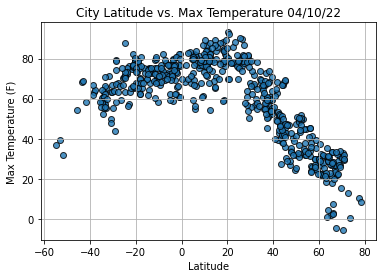

In [8]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

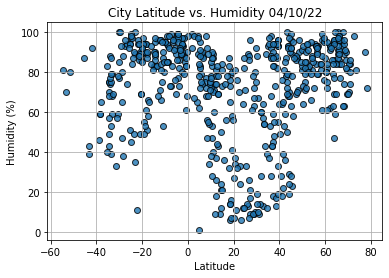

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

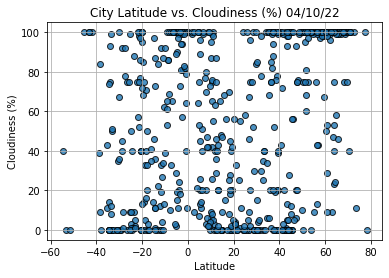

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

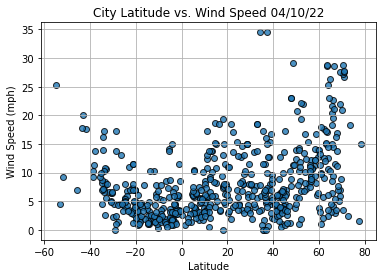

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City_ID                  13
City               Bologoye
Country                  RU
Date          4/6/2022 2:29
Lat                 57.8799
Lng                 34.1068
Max Temp              24.62
Humidity                 84
Cloudiness               97
Wind Speed            11.12
Name: 13, dtype: object

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

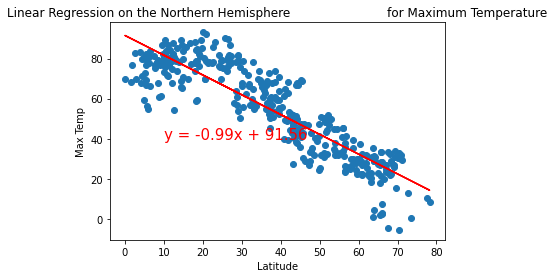

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

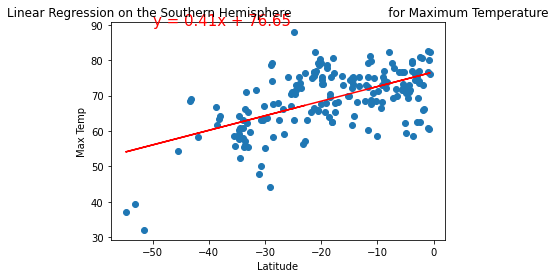

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

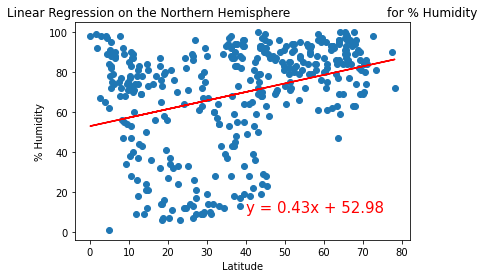

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

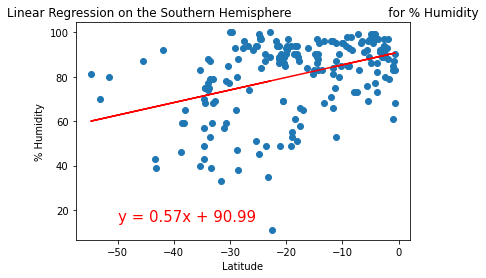

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

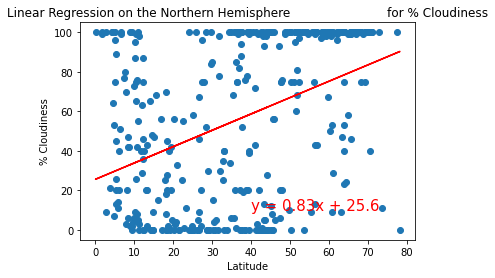

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

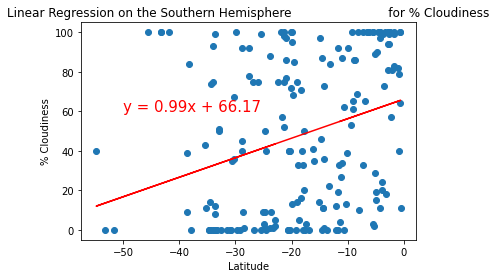

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

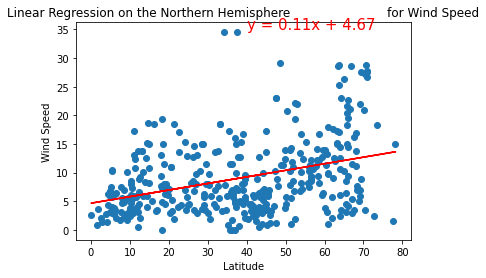

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

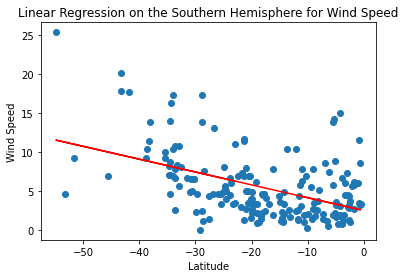

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))